# **Capstone Project**

## Introduction
The Purpose of this notebook is to provide 3 business recomendations backed by data analysis.
Each of our suggestions will have code associated with them. 

This code will demonstrate:
* How we accessed the data.
* How we cleaned the data.
* How we filtered the data. 
* How we visualized the data.

These steps allowed us to confidently arrive at 3 strong business reccomendations for our client, **Computing Vision**

## Importing Required Libraries and Using Sqlite3 to Connect to the Database

Before we can analyze our chosen data bases, we must first import the libraries that will enable us to do so.


In [4]:
#intsalling necessary Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

## Asking our first question

Our first question is: "Is there a certain month in which movies tend to perform the best financially?"

To answer this question we need to:
* Load in the CSV file that contains the information we need.
* Filter the data to see which movies came out in which month.
* Provide an additional filter that will return the gross revenue of any movie in a given month
* Add up the total gross revenues of all the movies that came out in a given month.
* Find the 10 year average of the monthly gross revenue
* Create visualizations that exhibit the findings.



In [13]:
#we load the csv and save it in a Dataframe

budgets = pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [14]:
budgets.info()

#we can see that there are 0 not null data, but in the cell above we can see 0 values
#We also see the datatypes for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
#we change the dtype of the date to a datetime so we can split the year and month of each movie

budgets["release_date"] = pd.to_datetime(budgets["release_date"])

In [16]:
#we create a column named month and year so we can save that in the dataframe
budgets['month'] = budgets["release_date"].dt.month_name()

budgets['year'] = budgets["release_date"].dt.year
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,December,2018
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",April,1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",July,2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,September,2015


In [17]:
#we clean the worlwide gross and production budget columns so we can sum the values

budgets['worldwide_gross'] = budgets.worldwide_gross.apply(lambda x:x.replace('$','').replace(',',''))
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)

budgets['production_budget'] = budgets.production_budget.apply(lambda x:x.replace('$','').replace(',',''))
budgets['production_budget'] = budgets['production_budget'].astype(float)

In [18]:
budgets #this will return budgets after it has been cleaned

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,425000000.0,"$760,507,625",2.776345e+09,December,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,May,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,June,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,December,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,$0,0.000000e+00,December,2018
5778,79,1999-04-02,Following,6000.0,"$48,482",2.404950e+05,April,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,"$1,338",1.338000e+03,July,2005
5780,81,2015-09-29,A Plague So Pleasant,1400.0,$0,0.000000e+00,September,2015


In [19]:
#we add a season column so we can also filter the data by season if its neccesary

season_dict = {'January': 'Winter',
               'February': 'Winter',
               'March': 'Spring', 
               'April': 'Spring',
               'May': 'Spring',
               'June': 'Summer',
               'July': 'Summer',
               'August': 'Summer',
               'September': 'Fall',
               'October': 'Fall',
               'November': 'Fall',
               'December': 'Winter'}
budgets['Season'] = budgets['month'].apply(lambda x: season_dict[x])

In [20]:
# we filter the data to get relevant information
recent_movies =  budgets.query("year >= 2012").iloc[:1400]
recent_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,Season
2,3,2019-06-07,Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,June,2019,Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,May,2015,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,December,2017,Winter
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225",2.053311e+09,December,2015,Winter
6,7,2018-04-27,Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,April,2018,Spring
...,...,...,...,...,...,...,...,...,...
5044,45,2015-12-18,Saul fia,1700000.0,"$1,777,043",9.696537e+06,December,2015,Winter
5047,48,2019-02-01,Braid,1660000.0,$0,8.074500e+04,February,2019,Winter
5059,60,2014-09-26,Two Night Stand,1600000.0,"$15,600",8.680810e+05,September,2014,Fall
5063,64,2016-10-21,Moonlight,1500000.0,"$27,854,931",6.524551e+07,October,2016,Fall


In [21]:
#This cell get the sum of all the gross grouped by month

sum_gross = recent_movies.groupby('month')[['worldwide_gross']].sum().sort_values(by='worldwide_gross', ascending=False)
sum_gross.index.name = "month"
sum_gross.reset_index(inplace=True)
sum_gross

,month,worldwide_gross
0,November,2.462244e+10
1,June,2.292101e+10
2,December,2.290977e+10
3,May,2.257021e+10
4,July,2.146751e+10
5,March,1.774840e+10
6,February,1.358781e+10
7,April,1.251088e+10
8,August,1.040229e+10
9,October,1.030930e+10


In [22]:
#we grouped the data by moth so we can have the worldwide gross per month

avrg_gross = recent_movies.groupby('month')[['worldwide_gross']].mean().sort_values(by='worldwide_gross', ascending=False)
avrg_gross.index.name = "month"
avrg_gross.reset_index(inplace=True)
avrg_gross

,month,worldwide_gross
0,May,2.257021e+08
1,July,2.213145e+08
2,June,2.122316e+08
3,November,1.938774e+08
4,December,1.414183e+08
5,March,1.344576e+08
6,February,1.235255e+08
7,April,1.214648e+08
8,August,9.543388e+07
9,October,8.054144e+07


Text(0, 0.5, 'Average Gross Revenue (in 100 Millions)')

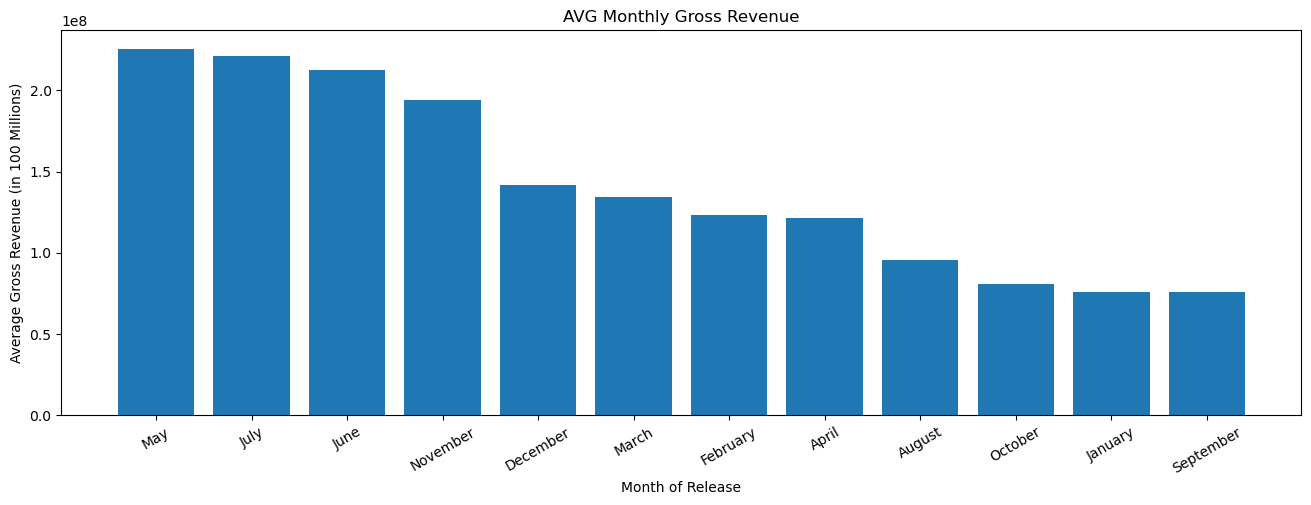

In [23]:
#Plot for the avg montly gross worldwide

fig = plt.subplots( figsize=(16, 5))

months = avrg_gross['month']
gross_profit = avrg_gross['worldwide_gross']
# Plot data
plt.bar(months, gross_profit)

# Customize appearance
plt.tick_params(axis="x", labelrotation=30)
plt.title('AVG Monthly Gross Revenue')
plt.xlabel('Month of Release')
plt.ylabel("Average Gross Revenue (in 100 Millions)")

In [24]:
#We create a df to make an analysis by season
seasons_gross = recent_movies.groupby('Season')[['worldwide_gross']].mean().sort_values(by='worldwide_gross', ascending=False)
seasons_gross.index.name = "Season"
seasons_gross.reset_index(inplace=True)
seasons_gross

,Season,worldwide_gross
0,Summer,1.744930e+08
1,Spring,1.577000e+08
2,Winter,1.180445e+08
3,Fall,1.173838e+08


Text(0, 0.5, 'Average Gross Revenue (in Millions)')

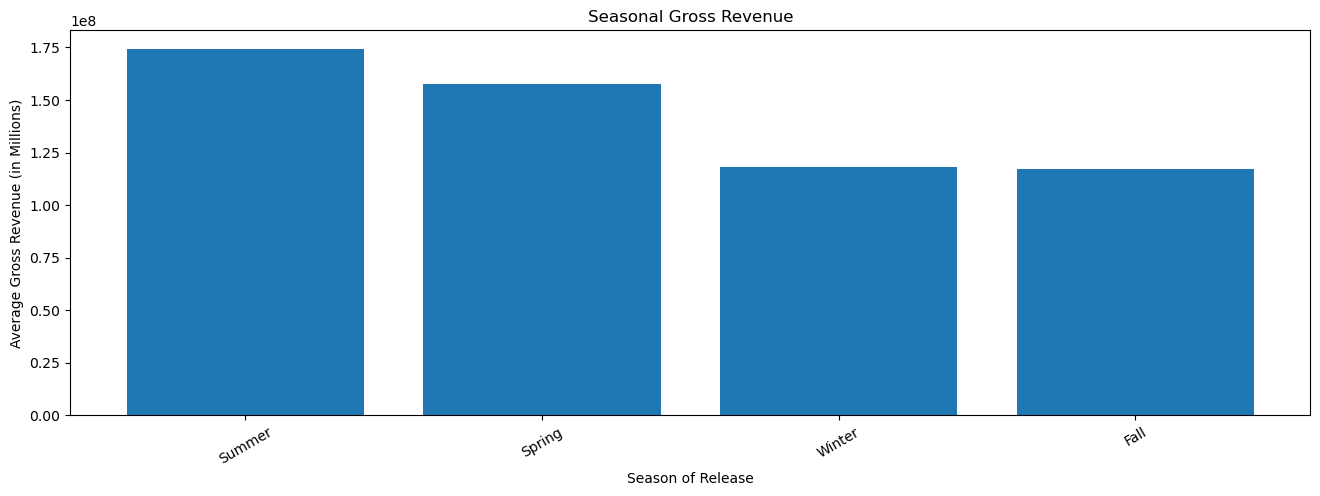

In [25]:
#we create a bar plot to see the seasonal gross revenue

fig = plt.subplots( figsize=(16, 5))

season = seasons_gross['Season']
gross = seasons_gross['worldwide_gross']
# Plot data
plt.bar(season, gross)

# Customize appearance
plt.tick_params(axis="x", labelrotation=30)
plt.title('Seasonal Gross Revenue')
plt.xlabel('Season of Release')
plt.ylabel("Average Gross Revenue (in Millions)")

## Asking our second question

Our first question is: "Which types of movies tend to get the best ratings"

To answer this question we need to:
*

